The point of this is to isolate the Elliptical and S0 galaxies to see if they have some intrinsic difference in observables to differetiate between the galaxies without using visual classification.

In [173]:
library("ggplot2")
H0<-100
C=299792.458

In [61]:
data=read.csv("../Data/HOPCAT2005TabSep.csv")
summary(data)

       ID               hipass_name       ra_str          dec_str    
 Min.   :   1   HIPASSJ0000-07:   1   4:58:01:   3   -01:41:57:   2  
 1st Qu.:2076   HIPASSJ0000-40:   1   0:02:30:   2   -01:59:18:   2  
 Median :3412   HIPASSJ0002-03:   1   0:34:12:   2   -03:52:00:   2  
 Mean   :3418   HIPASSJ0002-07:   1   0:41:43:   2   -04:08:19:   2  
 3rd Qu.:4872   HIPASSJ0002-15:   1   0:52:17:   2   -04:15:13:   2  
 Max.   :6307   HIPASSJ0002-52:   1   1:02:19:   2   -04:52:54:   2  
                (Other)       :4309   (Other):4302   (Other)  :4303  
    vel_mom         width_50max          Sp              Sint        
 Min.   :  226.8   Min.   :  0.0   Min.   :0.0224   Min.   :   0.10  
 1st Qu.: 1779.7   1st Qu.: 99.0   1st Qu.:0.0461   1st Qu.:   5.30  
 Median : 2876.3   Median :156.1   Median :0.0622   Median :   8.50  
 Mean   : 3275.1   Mean   :178.4   Mean   :0.1072   Mean   :  15.76  
 3rd Qu.: 4347.5   3rd Qu.:236.7   3rd Qu.:0.1013   3rd Qu.:  14.80  
 Max.   :12324.1   M

In [25]:
data$Morphology

[1] SAB(rs+)c            IBm? pec             Sa-b                
   [4] SA:(rs)bc:           Im                   SB(s)m:             
   [7] IB(s)m:              Sb: sp               XXXXX               
  [10] XXXXX                XXXXX                SB(rs)d             
  [13] XXXXX                Sc                   S pec (Ring B)      
  [16] SA(s)c               SA(s)d               SB(s)m              
  [19] SB(s)dm:             XXXXX                SAB(rs)c: pec       
  [22] SA(s)m:              Sc                   SA(r)c              
  [25] Dwarf                SB(s)c: pec          XXXXX               
  [28] SAB(rs)c             SBc: pec             Sc                  
  [31] SAB(rs)cd            Sa-b                 SAB(s)b:            
  [34] SB(s)cd: sp          SB(s)m               SA(r)bc             
  [37] Sa                   SA(s)cd              (R'_2)SAB(rs)cd     
  [40] SB(s)d               SB(s)c               SB(s)dm             
  [43] (R'_2)SB(rs)bc       SAB(s)c              XXXXX               
  [46] SB(rs)c              S...                 XXXXX               
  [49] (R')SA(rs)b          (R'_2)SB(rs)cd       SB(s)m              
  [52] (SA0?) + (SBd:)      SB(s)cd              S...                
  [55] SA(rs)c:             SB0^-                IB(s)m              
  [58] SA0^0                Dwarf                S...                
  [61] XXXXX                Sc                   SB(rs)cd            
  [64] (R)SAa: pec          XXXXX                Sc                  
  [67] Scp                  SBa                  SB(r)cd:            
  [70] Sb? sp               SA(rs)c              SB(s)c              
  [73] (R:)SAB(r)b    Sy1   Sm                   SAB(s)d:            
  [76] XXXXX                XXXXX                XXXXX               
  [79] SB(s)cd: sp          Sc                   I0? pec             
  [82] SA(rs)c              Sa                   XXXXX               
  [85] SA(s)c         Sy2   SA(s)0/a:            Sbc                 
  [88] SB...                SB(s)c: sp           SAB(r)d             
  [91] XXXXX                SAB(rs)bc:           SB...               
  [94] (R')SB(r)bc pec      SB(s)d               IB(s)m              
  [97] SAB(r)c              XXXXX                XXXXX               
 [100] (R':)SB(rs)bc        Sc                   XXXXX               
 [103] SB(s)d               SAB(s)d:             Sb-c                
 [106] I0                   SB(s)d               SAB(s)m             
 [109] SA(s)dm              SB.../Irr            XXXXX               
 [112] Im                   XXXXX                SA(s)c: sp          
 [115] Sb                   XXXXX                SA(s)c              
 [118] SB(s)d: sp           SA(s)cd              (R')SA(rs)a    HII  
 [121] XXXXX                Sb                   (R')SAB(rs)c        
 [124] SB(rs+)bc:           S0+:                 SAB(r)dm            
 [127] S?                   SAB(rs)c             ...                 
 [130] IAB(s)m              Sc:                  XXXXX               
 [133] SB(s)m               XXXXX                SAB(rs)m            
 [136] Dwarf                (R)SAB(r)a           IB(s)m              
 [139] SB0?           HII   pec                  XXXXX               
 [142] SAB(rs)b             XXXXX                XXXXX               
 [145] (R':)SAB(rl)a        SAB(s)b pec          (R)SB(r)b           
 [148] IB(s)m               Sc? sp               SAB(rs)bc      HII  
 [151] S...                 XXXXX                XXXXX               
 [154] XXXXX                SA(s)c               SB(s)m              
 [157] SB(rs)c              Spec                 SB(r)b:             
 [160] XXXXX                SB(s)cd              Scd                 
 [163] SA(rs)c              XXXXX                SAB(s)m:            
 [166] SB(rs)cd             SAB(rs:)b:           Sc                  
 [169] SAB(s)c              XXXXX                XXXXX               
 [172] XXXXX 

In [20]:
df=data.frame(data)

In [55]:
df$Morphology_Filtered[grepl('S0', df$Morphology)=="TRUE"]="S)"
df$Morphology_Filtered[grepl('pec', df$Morphology)=="TRUE"]="Peculiar"
df$Morphology_Filtered[grepl('SB', df$Morphology)=="TRUE"]="SB"
df$Morphology_Filtered[grepl('SA', df$Morphology)=="TRUE"]="SA"
df$Morphology_Filtered[grepl('E', df$Morphology)=="TRUE"]="E1"

In [56]:
df$Morphology[which(df$Morphology=="E")]

[1] E E E E E E E E E E E E E E E E
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

In [93]:
df$Morphology[which(df$Morphology_Filtered=="E1")]
write.table(df$Galaxy_Name[which(df$Morphology_Filtered=="E1")],file="Ellipticals.txt",sep="\t",row.names = FALSE,col.names = FALSE,quote = FALSE)

[1] E                    2MASS Extended Ver.2 E                   
 [4] SAB(rs)c       LINER SAB(r)bc       LINER E?                  
 [7] SAB(r)c        LINER SA(s)bc;HII    LINER E5-6           Sy2  
[10] SB(rs)c        LINER S              NELG  E                   
[13] E                    (R')SAB(rs)bc  LINER SA0-:          LINER
[16] (R':)SA(s)ab   LINER Sb             LINER SA(s)0^0;LINER Sy1.5
[19] SB(s)cd pec    NELG  SAB(s)bc pec   NELG  SA(r)b         LINER
[22] S?             NELG  (R')SA(r)bc    LINER (R')SB(s)ab;HIILINER
[25] E                    E                    E              HII  
[28] E                    E3             LINER (R_1)SB(rl)0/a LINER
[31] E                    2MASS Extended Ver.2 E                   
[34] Sb             NELG  E                    SB(rs:)bc:     LINER
[37] E0                   E pec:               E                   
[40] E                    2MASS Extended Ver.2 E                   
[43] E0-1                 E                    E                   
[46] 2MASS Extended Ver.2 E+ pec:              E                   
[49] 2MASS Extended Ver.2 Spec sp; LINER Sy2   2MASS Extended Ver.2
[52] S0 pec?        NELG  LINER                SAB(r)bc       LINER
[55] E pec:               cE?                  SABc:          LINER
[58] SAB(rs)cd;Sy?  LINER E?                   SAB(rs)bc      LINER
[61] SBb: sp       LINER2
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

In [59]:
df$hipass_name[grepl("NELG",df$Morphology)=="TRUE"]

[1] HIPASSJ2056-49 HIPASSJ0057-46 HIPASSJ2016-44 HIPASSJ0227-43 HIPASSJ0726-35
[6] HIPASSJ1038-07
4315 Levels: HIPASSJ0000-07 HIPASSJ0000-40 HIPASSJ0002-03 ... HIPASSJ2359-80

The classifcation here seems annoying. What is an NELG? Lets find out. Narrow emission line galaxies. Checked on SIMBAD and none of them are E's or S0's. I had a thought to cross check morphology classifications on SIMBAD but remembering that the S0 classifications in HIPASS were more accurate than those on SIMBAD I promptly dropped that idea. <b>I just did a cross check anyway and found that ~2000 galaxies don't have morphologies on simbad.</b>

In [77]:
df$Galaxy_Name[grepl("LINER",df$Morphology)=="TRUE"]
x
write.table(df$Galaxy_Name,file="gal_names.txt",sep="\t",row.names = FALSE,col.names = FALSE,quote = FALSE)

[1] NGC 7083       NGC 6744       IC 4901        NGC 7205       NGC 7124      
 [6] ESO 235- G 055 NGC 5266       NGC 5064       ESO 240- G 011 NGC 7213      
[11] NGC 6902       NGC 7162       NGC 7552       IC 1459        NGC 1326      
[16] ESO 355- G 030 NGC 0839       ARP 140        NGC 4981       NGC 4666      
[21] NGC 0237       NGC 3521       NGC 1055      
3511 Levels: [ISI96] 0359-020 [KK2000] 34 [KKS2000] 12 ... XXXXX

[1] NGC 7083       NGC 6744       IC 4901        NGC 7205       NGC 7124      
 [6] ESO 235- G 055 NGC 5266       NGC 5064       ESO 240- G 011 NGC 7213      
[11] NGC 6902       NGC 7162       NGC 7552       IC 1459        NGC 1326      
[16] ESO 355- G 030 NGC 0839       ARP 140        NGC 4981       NGC 4666      
[21] NGC 0237       NGC 3521       NGC 1055      
3511 Levels: [ISI96] 0359-020 [KK2000] 34 [KKS2000] 12 ... XXXXX

In [66]:
print(df$Galaxy_Name)

   [1] NGC 2573         NGC 2573B        ESO 001- G 005   ESO 001- G 006  
   [5] ESO 008- G 008   ESO 009- G 005   ESO 004- G 017   ESO 005- G 004  
   [9] XXXXX            2MASX J05161938- 2MASX J20404771- ESO 010- G 004  
  [13] XXXXX            ESO 002- G 012   NGC 6438A        ESO 009- G 010  
  [17] ESO 007- G 006   ESO 010- G 006   ESO 003- G 015   XXXXX           
  [21] ESO 003- G 007   ESO 004- G 006   ESO 006- G 008   IC 2051         
  [25] ESO 003- G 011   ESO 004- G 013   XXXXX            ESO 003- G 003  
  [29] ESO 004- G 023   ESO 007- G 003   ESO 008- G 004   ESO 009- G 011  
  [33] ESO 009- G 001   ESO 011- G 005   ESO 008- G 007   NGC 7637        
  [37] ESO 015- G 015   IC 4545          ESO 026- G 001   ESO 012- G 010  
  [41] NGC 7095         ESO 019- G 003   ESO 015- G 005   ESO 027- G 014  
  [45] 2MASX J04065413- ESO 012- G 012   ESO 013-IG 001   XXXXX           
  [49] NGC 3149         ESO 021- G 003   ESO 012- G 014   AM 0642-801     
  [53] ESO 013- G 009   E

In [76]:
df$Morphology[which(df$Galaxy_Name=="IC 1459")]

[1] E3             LINER
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

Ok, I have cross checked the LINER classifcations

In [78]:
write.table(x,file="LINER_names.txt",sep="\t",row.names = FALSE,col.names = FALSE,quote = FALSE)

In [81]:
df$Morphology[which(df$Galaxy_Name=="IC 1459")]
df$Morphology_Filtered[which(df$Galaxy_Name=="IC 1459")]

[1] E3             LINER
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] "E1"

Ok, the only liner that has an E classification was picked up by the filtering. Let's read in the SIMBAD output and see how many HIPASS E's are classified by simbad that way (or vice versa).

In [170]:
df$Morphology[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE"]

df$Morphology[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="TRUE" &
              grepl('NELG',df$Morphology)=="FALSE"]

df$Morphology[grepl('2MAS',df$Galaxy_Name)=="TRUE" & grepl('E', df$Morphology)=="TRUE"]
df$Morphology[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('Extended',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE"]

which(grepl('2MAS',df$Galaxy_Name)=="TRUE" & grepl('E', df$Morphology)=="TRUE")

which(grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE")

[1] E                  E                  E?                 E5-6           Sy2
 [5] E                  E                  E                  E                 
 [9] E              HII E                  E                  E                 
[13] E                  E0                 E pec:             E                 
[17] E                  E                  E0-1               E                 
[21] E                  E+ pec:            E                  E pec:            
[25] cE?                E?                
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] 2MASS Extended Ver.2 2MASS Extended Ver.2 2MASS Extended Ver.2
[4] 2MASS Extended Ver.2 2MASS Extended Ver.2 2MASS Extended Ver.2
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] E                    2MASS Extended Ver.2 E                   
 [4] E                    E                    E                   
 [7] 2MASS Extended Ver.2 E                    E                   
[10] 2MASS Extended Ver.2 2MASS Extended Ver.2 E                   
[13] 2MASS Extended Ver.2
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] E                  E                  E?                 E5-6           Sy2
 [5] E                  E                  E                  E                 
 [9] E              HII E                  E                  E                 
[13] E                  E0                 E pec:             E                 
[17] E                  E                  E0-1               E                 
[21] E                  E+ pec:            E                  E pec:            
[25] cE?                E?                
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1]  220  286 1118 1783 1788 1819 1892 2019 2260 2533 3294 3424 3488

[1]  220  351  464  852 1116 1118 1783 1788 1805 1819 1889 1913 2019 2221 2230
[16] 2260 2380 2585 3101 3129 3137 3415 3424 3972 4011 4152

<b> I'm going to annoyed at the 2mass galaxies and don't know what to do with them. NGC 3481 is a spiral. There are a few 2mass ellipticals. I think I need to cut on Ver.2 and not 2Mass. The 2MASS galaxies with E classification seem to get into the sample. I have to check this by hand. I have now checked them by hand and the 2MASS galaxies that have an E classification have made it through the filter.</b>

In [96]:
df$Galaxy_Name[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE"]
x=df$Galaxy_Name[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE"]
write.table(x,file="ellipticals.txt",sep="\t",row.names = FALSE,col.names = FALSE,quote = FALSE)

[1] 2MASX J10355609- NGC 1490         IRAS  09106-6258 IC 4889         
 [5] AM 2141-491 NED0 2MASX J12165297- 2MASX J21525329- 2MASX J12310403-
 [9] ESO 297- G 012   2MASX J13092158- IC 2006          APMBGC 349-127+0
[13] 2MASX J12201595- NGC 4936         NGC 5291         2MASX J12063106-
[17] 6dF J0023042-275 IRAS  17028-2436 NGC 5796         FGC 094A        
[21] MCG -03-34-020   NGC 1889         2MASX J06501060- ARP 132 NED02   
[25] UGC 04508        UGC 01382       
3511 Levels: [ISI96] 0359-020 [KK2000] 34 [KKS2000] 12 ... XXXXX

Double checked these galaxies on simbad, and of the ones that it found all of them are ellipticals so that's good.

In [162]:
length(df$Morphology[grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('Extended',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE"])

[1] 26

In [95]:
length(which(df$Morphology=="E"))

[1] 16

Ok, lets put together a data frame that only has S0 and Elliptical galaxies.

In [246]:
E_index=which(grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE")
df$Morphology[E_index]
df$Morphology_Filtered="Z_Other"
df$Morphology_Filtered[E_index]="E"

[1] E                  E                  E?                 E5-6           Sy2
 [5] E                  E                  E                  E                 
 [9] E              HII E                  E                  E                 
[13] E                  E0                 E pec:             E                 
[17] E                  E                  E0-1               E                 
[21] E                  E+ pec:            E                  E pec:            
[25] cE?                E?                
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

In [247]:
df$Morphology[grepl("S0",df$Morphology)=="TRUE"]
length(df$Morphology[grepl("S0",df$Morphology)=="TRUE"])
S0_index=which(grepl("S0",df$Morphology)=="TRUE")
which(grepl("S0",df$Morphology)=="TRUE")
df$Morphology_Filtered[S0_index]="S0"

[1] S0+:                 S0?                  S0                  
 [4] S0                   S0?                  S0?                 
 [7] dS0p                 S0                   S0+? pec            
[10] S0                   S0^0^ pec:           S0/a? pec sp        
[13] (R')S0^0^: pec       S0^0^:               S0                  
[16] S0-a                 S0-a:                S0             Sy2  
[19] S0                   S0                   S0                  
[22] S0?                  S0/a:                S0                  
[25] S0+? pec             S0                   .S0                 
[28] S0                   S0-                  S0                  
[31] S0^0^? sp            S0+ pec sp           S0+: sp             
[34] S0+:                 S0 pec?              S0/a: sp            
[37] S0 pec?              S0+: sp              S0/a?               
[40] S0- pec sp           S0 pec?        NELG  S0+: sp             
[43] S0+ pec sp           S0?                  S0^0^               
[46] S0- pec:       HII   S0+ pec:       Sbrst S0/a                
[49] S0/a                
1037 Levels: ... .S0 (L)SB(rs)0^0 (PR?) (PR?)SB:(rs:)cd: (PR?)SB(r)cd: ... XXXXX

[1] 49

[1]  125  217  219  276  302  433  434  435  454  518  651  857  937 1114 1122
[16] 1142 1211 1237 1430 1435 1849 1907 1945 2192 2206 2314 2394 2441 2513 2743
[31] 2802 2946 3094 3111 3169 3253 3280 3372 3409 3458 3686 3815 3911 3937 3943
[46] 3976 3991 4181 4245

In [248]:
table(df$Morphology_Filtered)


      E      S0 Z_Other 
     26      49    4240 

In [249]:
df_S0<-subset.data.frame(df,grepl("S0",df$Morphology)=="TRUE")
df_E<-subset.data.frame(df,grepl('E', df$Morphology)=="TRUE" & 
              grepl('LINER',df$Morphology)=="FALSE" & 
              grepl('2MASS',df$Morphology)=="FALSE" &
              grepl('NELG',df$Morphology)=="FALSE" )


In [250]:
summary(df_E)

       ID                hipass_name      ra_str        dec_str  
 Min.   : 658   HIPASSJ0014-35 : 1   0:14:10 : 1   -00:05:40: 1  
 1st Qu.:2944   HIPASSJ0023-27 : 1   0:23:15 : 1   -02:25:01: 1  
 Median :3366   HIPASSJ0136-37 : 1   1:36:25 : 1   -03:02:29: 1  
 Mean   :3482   HIPASSJ0154-00b: 1   1:54:55 : 1   -11:15:31: 1  
 3rd Qu.:4706   HIPASSJ0352-66 : 1   10:35:47: 1   -11:28:07: 1  
 Max.   :6037   HIPASSJ0354-36a: 1   11:19:08: 1   -16:05:27: 1  
                (Other)        :20   (Other) :20   (Other)  :20  
    vel_mom      width_50max          Sp               Sint           A_IMAGE  
 Min.   :1380   Min.   : 53.9   Min.   :0.03210   Min.   : 3.400   10.225 : 1  
 1st Qu.:2506   1st Qu.:117.8   1st Qu.:0.04570   1st Qu.: 5.625   10.235 : 1  
 Median :3047   Median :138.5   Median :0.05720   Median : 7.050   10.642 : 1  
 Mean   :3684   Mean   :185.4   Mean   :0.07042   Mean   :10.481   11.108 : 1  
 3rd Qu.:4997   3rd Qu.:224.7   3rd Qu.:0.06673   3rd Qu.: 9.650   11.52

In [251]:
summary(df_S0)

       ID               hipass_name      ra_str        dec_str  
 Min.   : 337   HIPASSJ0041-21: 1   0:41:15 : 1   -02:42:22: 1  
 1st Qu.:1902   HIPASSJ0045-15: 1   0:45:48 : 1   -02:58:44: 1  
 Median :3472   HIPASSJ0046-13: 1   0:46:27 : 1   -03:30:22: 1  
 Mean   :3392   HIPASSJ0103-03: 1   1:03:10 : 1   -03:35:44: 1  
 3rd Qu.:4944   HIPASSJ0139-48: 1   1:39:16 : 1   -03:53:32: 1  
 Max.   :6147   HIPASSJ0308-02: 1   10:38:25: 1   -05:08:10: 1  
                (Other)       :43   (Other) :43   (Other)  :43  
    vel_mom        width_50max          Sp               Sint       
 Min.   : 818.9   Min.   : 36.8   Min.   :0.03340   Min.   :  2.10  
 1st Qu.:1651.6   1st Qu.:102.5   1st Qu.:0.04800   1st Qu.:  5.40  
 Median :2610.0   Median :157.2   Median :0.06210   Median :  9.10  
 Mean   :2882.1   Mean   :191.3   Mean   :0.08123   Mean   : 12.97  
 3rd Qu.:3693.5   3rd Qu.:252.8   3rd Qu.:0.09850   3rd Qu.: 12.80  
 Max.   :7394.7   Max.   :646.4   Max.   :0.29140   Max.   :110.50

In [252]:
df_new<-rbind.data.frame(df_S0,df_E)
length(df_new$Morphology)
summary(df_new)

[1] 75

       ID               hipass_name     ra_str        dec_str  
 Min.   : 337   HIPASSJ0014-35: 1   0:14:10: 1   -00:05:40: 1  
 1st Qu.:2116   HIPASSJ0023-27: 1   0:23:15: 1   -02:25:01: 1  
 Median :3472   HIPASSJ0041-21: 1   0:41:15: 1   -02:42:22: 1  
 Mean   :3423   HIPASSJ0045-15: 1   0:45:48: 1   -02:58:44: 1  
 3rd Qu.:4838   HIPASSJ0046-13: 1   0:46:27: 1   -03:02:29: 1  
 Max.   :6147   HIPASSJ0103-03: 1   1:03:10: 1   -03:30:22: 1  
                (Other)       :69   (Other):69   (Other)  :69  
    vel_mom        width_50max          Sp               Sint       
 Min.   : 818.9   Min.   : 36.8   Min.   :0.03210   Min.   :  2.10  
 1st Qu.:1718.5   1st Qu.:109.1   1st Qu.:0.04745   1st Qu.:  5.40  
 Median :2754.4   Median :155.9   Median :0.05930   Median :  8.20  
 Mean   :3160.1   Mean   :189.2   Mean   :0.07748   Mean   : 12.11  
 3rd Qu.:4348.8   3rd Qu.:230.5   3rd Qu.:0.08390   3rd Qu.: 11.15  
 Max.   :8040.7   Max.   :653.6   Max.   :0.30310   Max.   :110.50  
     

In [253]:
df_new$M_HI=2.365*10^5*(df_new$vel_mom/H0)^2*df_new$Sint
df$M_HI=2.365*10^5*(df$vel_mom/H0)^2*df$Sint

In [254]:
df_new$Morphology_Filtered[grepl("S0",df_new$Morphology)=="TRUE"]="S0"
df_new$Morphology_Filtered[grepl('E', df_new$Morphology)=="TRUE" & 
              grepl('LINER',df_new$Morphology)=="FALSE" & 
              grepl('2MASS',df_new$Morphology)=="FALSE" &
              grepl('NELG',df_new$Morphology)=="FALSE" ]="E"

# 

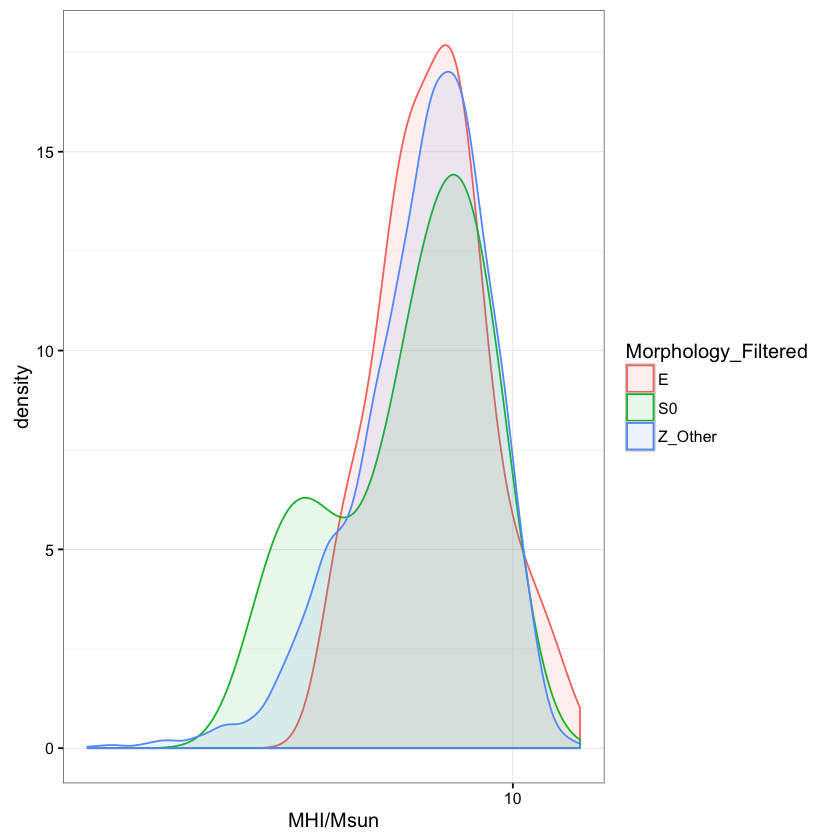

In [255]:
ggplot(df,aes(log10(M_HI),color=Morphology_Filtered,fill=Morphology_Filtered)) + 
geom_density(alpha=0.1) + xlab("MHI/Msun") + theme_bw() + scale_x_log10() 

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
: Removed 697 rows containing missing values (geom_point).

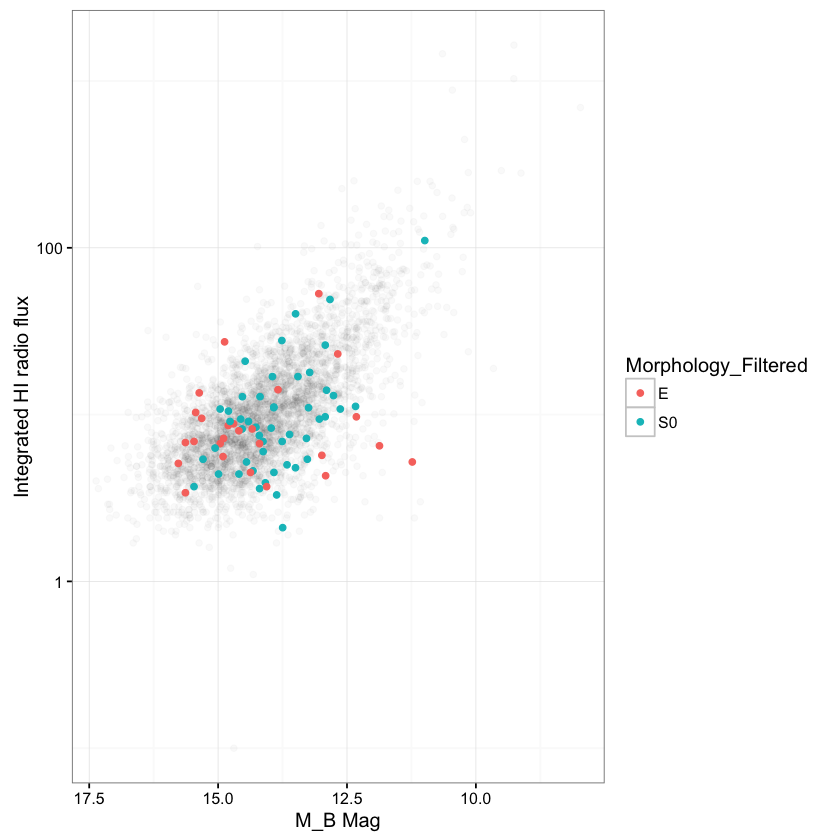

In [278]:
ggplot(df,aes(x=as.numeric(as.character(Red_Mag_AUTO_Calibrated)),y=Sint)) + 
    geom_point(alpha=0.025) + 
    geom_point(data = subset(df,Morphology_Filtered != 'Z_Other'),aes(color = Morphology_Filtered)) +
    xlab("M_B Mag") + ylab("Integrated HI radio flux") + 
    theme_bw() + scale_y_log10()  + scale_x_reverse()
   # scale_colour_manual(values=c("ZOther"="grey","E"="red", "S0"="blue"))

# red=as.numeric(as.character(df_new$Red_Mag_AUTO_Calibrated))
summary(red)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
: Removed 697 rows containing missing values (geom_point).

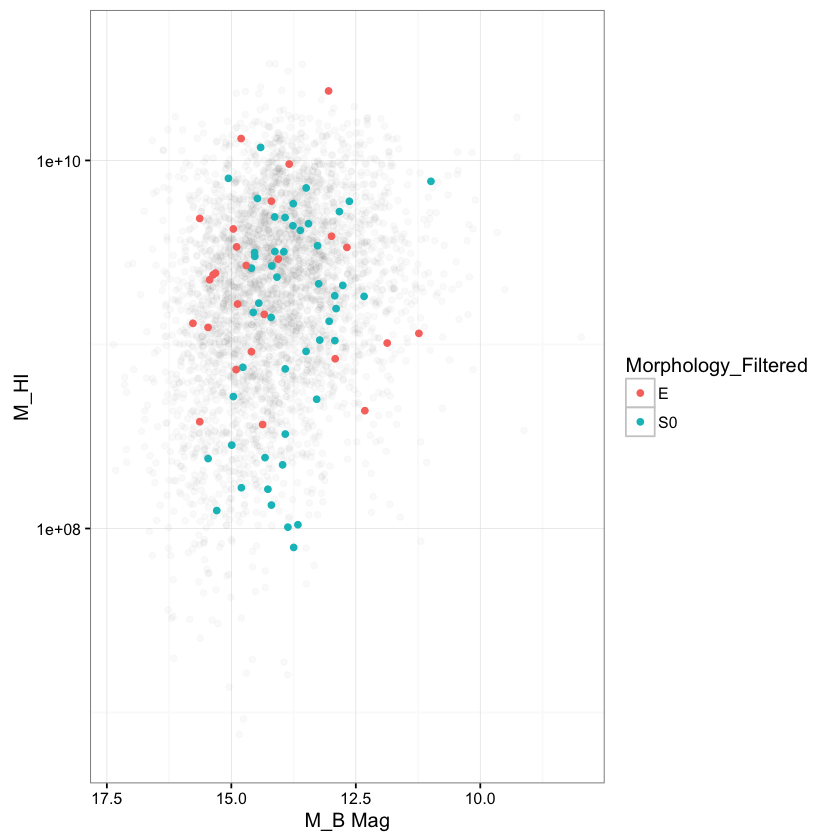

In [279]:
ggplot(df,aes(x=as.numeric(as.character(Red_Mag_AUTO_Calibrated)),M_HI)) + 
    geom_point(alpha=0.025) + 
    geom_point(data = subset(df,Morphology_Filtered != 'Z_Other'),aes(color = Morphology_Filtered)) +
    xlab("M_B Mag") + ylab("M_HI") + 
    theme_bw() + scale_y_log10()  + scale_x_reverse()